# Decision Trees 

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris          # Test dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [70]:
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_name = data.target_names

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

mod_data = np.hstack((y_train.reshape(-1, 1), X_train))
print(f"Dimension of the dataset: {mod_data.shape}")
df_data = pd.DataFrame(
    columns=["Iris"] + feature_names,
    data = np.hstack((y_train.reshape(-1, 1), X_train))
)

df_data.head()

Dimension of the dataset: (100, 5)


,Iris,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.0,6.4,2.8,5.6,2.1
1,1.0,5.6,3.0,4.1,1.3
2,0.0,5.1,3.7,1.5,0.4
3,0.0,5.0,3.4,1.5,0.2
4,2.0,7.9,3.8,6.4,2.0


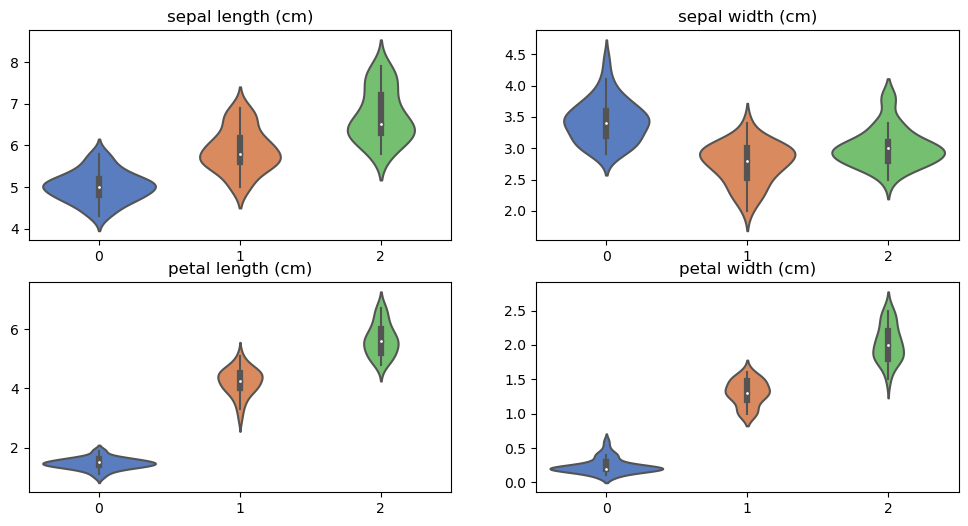

In [71]:
# Data Visualisation
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i in range(len(feature_names)):

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.violinplot(x=y_train, y=X_train[:, i], palette="muted", ax=ax)
    ax.set_title(feature_names[i])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

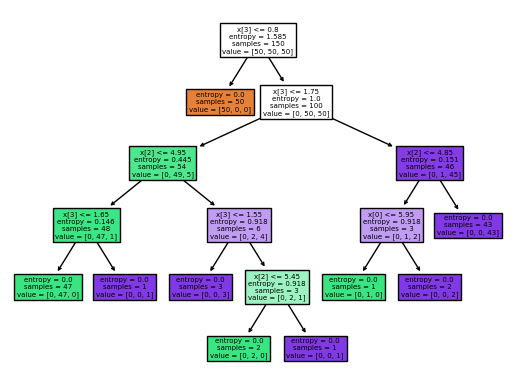

In [72]:
# Fitting the decision tree
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best"
)
model = model.fit(X, y)

plot_tree(model, filled=True)

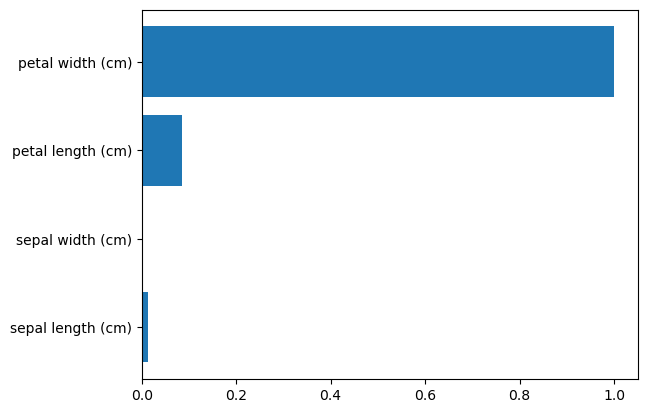

In [90]:
# Feature importance
arr_importance = model.feature_importances_ / max(model.feature_importances_)
y_pos = np.arange(len(arr_importance))
arr_plot = np.array([y_pos, arr_importance]).T
arr_plot = arr_plot[arr_plot[:, 1].argsort()]

fig, ax = plt.subplots()
ax.barh(arr_plot[:, 0], arr_plot[:, 1])
ax.set_yticks(y_pos, feature_names)

plt.show()

Evaluate the performances of the model on the training set

In [93]:
pred = model.predict(X_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
